Constants

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
import pandas as pd
input_dir = "creditcard.csv"
cc = pd.read_csv(input_dir)
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc.Class.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [24]:
cc.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [59]:
# split train and valid dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import torch

X = cc.drop('Class',axis=1)
X = X.astype(float)
y = cc['Class'].values
X = MinMaxScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=199,test_size=0.2,stratify=y)
X_train=torch.tensor(X_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32).view(-1, 1)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32).view(-1, 1)


In [39]:
X_train

tensor([[3.9001e-01, 9.7843e-01, 7.6978e-01,  ..., 4.1663e-01, 3.1322e-01,
         1.4480e-03],
        [8.8335e-01, 9.4725e-01, 7.5910e-01,  ..., 4.2055e-01, 3.1436e-01,
         1.0120e-02],
        [2.4424e-01, 9.8000e-01, 7.6735e-01,  ..., 4.1700e-01, 3.1335e-01,
         3.8924e-05],
        ...,
        [9.3477e-01, 9.5344e-01, 7.5817e-01,  ..., 4.1852e-01, 3.1281e-01,
         3.4058e-04],
        [4.1038e-01, 9.5784e-01, 7.5923e-01,  ..., 4.1972e-01, 3.1742e-01,
         2.0824e-03],
        [7.2918e-01, 9.9349e-01, 7.6832e-01,  ..., 4.1526e-01, 3.1248e-01,
         7.7069e-05]])

# Neural Network

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

In [51]:
num_train = len(X_train)
num_features = X_train.size()[1]

In [52]:
num_features

30

In [60]:
# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x



In [139]:
model = NeuralNet()
loss_fun = nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)
n_epochs = 100
batch_size = 32
train_recall_list = []
test_recall_list = []
training_time_list = []
pct_of_train_data = []
epoch_loss_list = []

In [140]:
print(num_train)

227845


In [141]:
import time
import numpy as np
from sklearn.metrics import recall_score
for i in np.linspace(0.1, 1.0, 10):
    print('training', i, 'of data')
    epoch_loss_this_iter = []
    start = time.time()
    model = NeuralNet()
    optimizer=optim.Adam(model.parameters(),lr=0.0001)
    num_train_this_iter = int(num_train*i)
    print(num_train_this_iter)
    for epoch in range(n_epochs):
        loss = 0
        for i in range(0,num_train_this_iter,batch_size):
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]
            optimizer.zero_grad()
            outputs=model(inputs)
            batch_loss = loss_fun(outputs,labels)

            batch_loss.backward()
            optimizer.step()

            loss+=batch_loss
        epoch_loss_this_iter.append(loss)
        print(epoch_loss_this_iter)
    
    epoch_loss_list.append(epoch_loss_this_iter)
    print('epoch losses',epoch_loss_list)
    training_time_list.append(time.time()-start)
    


    # Evaluate the model
    model.eval()
    # on train dataset 
    correct = 0
    total = 0
    with torch.no_grad():
        inputs = X_train[:num_train_this_iter]
        labels = y_train[:num_train_this_iter]
        outputs = model(inputs)
            
        _, predicted = torch.max(outputs.data, 1)
        recall = recall_score(labels, predicted)
        print(recall)
        train_recall_list.append(recall)
    
    # on test dataset 
    correct = 0
    total = 0
    with torch.no_grad():
        inputs = X_test[:num_train_this_iter]
        labels = y_test[:num_train_this_iter]
        outputs = model(inputs)
            
        _, predicted = torch.max(outputs.data, 1)
        recall = recall_score(labels, predicted)
        print(recall)
        test_recall_list.append(recall)
    
    pct_of_train_data.append(int(i*100))


    del model 
    
    

training 0.1 of data
22784
[tensor(219.6716, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>), tensor(10.2965, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>), tensor(10.2965, grad_fn=<AddBackward0>), tensor(8.9681, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>), tensor(10.2965, grad_fn=<AddBackward0>), tensor(8.9681, grad_fn=<AddBackward0>), tensor(8.7079, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>), tensor(10.2965, grad_fn=<AddBackward0>), tensor(8.9681, grad_fn=<AddBackward0>), tensor(8.7079, grad_fn=<AddBackward0>), tensor(8.6236, grad_fn=<AddBackward0>)]
[tensor(219.6716, grad_fn=<AddBackward0>), tensor(21.3582, grad_fn=<AddBackward0>), tensor(10.2965, grad_f

KeyboardInterrupt: 

In [70]:

from torch.utils.data import DataLoader, TensorDataset
for epoch in range(n_epochs):
    loss = 0
    for i in range(0,num_train,batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]
        optimizer.zero_grad()
        outputs=model(inputs)
        batch_loss = loss_fun(outputs,labels)
        batch_loss.backward()
        optimizer.step()
        loss+=batch_loss

    print(f'[Epoch {epoch + 1}, loss {loss}')

print('Finished Training')

[Epoch 1, loss 455.09674072265625
[Epoch 2, loss 82.25897216796875
[Epoch 3, loss 75.6447982788086
[Epoch 4, loss 64.7777328491211
[Epoch 5, loss 51.2923469543457
[Epoch 6, loss 41.89947509765625
[Epoch 7, loss 36.106624603271484
[Epoch 8, loss 32.756439208984375
[Epoch 9, loss 30.711898803710938
[Epoch 10, loss 29.27613639831543
[Epoch 11, loss 28.201322555541992
[Epoch 12, loss 27.385305404663086
[Epoch 13, loss 26.717041015625
[Epoch 14, loss 26.161479949951172
[Epoch 15, loss 25.698762893676758
[Epoch 16, loss 25.334131240844727
[Epoch 17, loss 25.04638671875
[Epoch 18, loss 24.818397521972656
[Epoch 19, loss 24.624317169189453
[Epoch 20, loss 24.46842384338379
[Epoch 21, loss 24.333364486694336
[Epoch 22, loss 24.220012664794922
[Epoch 23, loss 24.115800857543945
[Epoch 24, loss 24.0208797454834
[Epoch 25, loss 23.935518264770508
[Epoch 26, loss 23.86016845703125
[Epoch 27, loss 23.78871726989746
[Epoch 28, loss 23.72185516357422
[Epoch 29, loss 23.66715431213379
[Epoch 30, loss 2

## testing on validation set

In [116]:
outputs

array([0.0006962 , 0.0004501 , 0.00060688, ..., 0.0005661 , 0.00055214,
       0.00073984])

In [117]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
        outputs = model(X_test)
        predictions=(outputs>0.5).float()
        print((predictions == y_test).float().mean().item())

0.9995084404945374


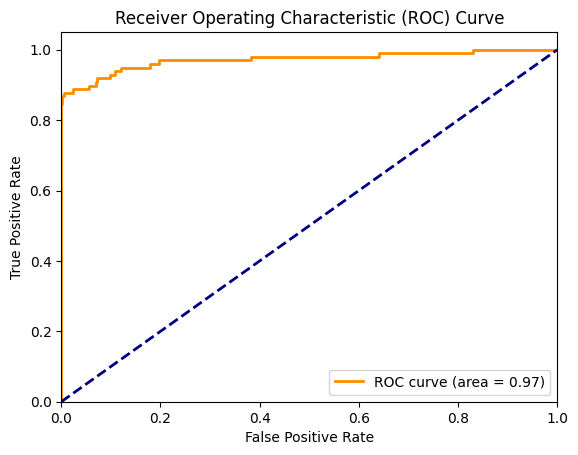

In [118]:
import matplotlib.pyplot as plt
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.view(-1), outputs)
roc_auc = roc_auc_score(y_test.view(-1), outputs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(y_test.view(-1), predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# KNN

In [75]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)  
# Fit the KNN model
knn.fit(X_train, y_train)

/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [159]:
# grid search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, make_scorer


# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 21)}

# Define recall as the scoring metric
scorer = make_scorer(recall_score)

# Initialize GridSearchCV with the KNN classifier and the parameter grid
grid_search = GridSearchCV(knn, param_grid, scoring=scorer, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train.view(-1))

# Extract the best model and best parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validated recall: {best_recall}")

# Evaluate the best model on the test set
y_test_pred = best_knn.predict(X_test)
test_recall = recall_score(y_test.view(-1), y_test_pred)
print(f"Test set recall: {test_recall}")

# Retrieve the recall scores for all parameter settings
cv_results = grid_search.cv_results_
recall_scores = cv_results['mean_test_score']
n_neighbors = param_grid['n_neighbors']

# Print the recall scores for each n_neighbors
for n, recall in zip(n_neighbors, recall_scores):
    print(f"n_neighbors: {n}, Recall: {recall}")




Best parameters: {'n_neighbors': 1}
Best cross-validated recall: 0.7718597857838364
Test set recall: 0.826530612244898
n_neighbors: 1, Recall: 0.7718597857838364
n_neighbors: 2, Recall: 0.6904901006166829
n_neighbors: 3, Recall: 0.7439143135345667
n_neighbors: 4, Recall: 0.7260954235637781
n_neighbors: 5, Recall: 0.7540084388185655
n_neighbors: 6, Recall: 0.7184680298604349
n_neighbors: 7, Recall: 0.7438493995456021
n_neighbors: 8, Recall: 0.7235313209996754
n_neighbors: 9, Recall: 0.7387536514118793
n_neighbors: 10, Recall: 0.7108406361570918
n_neighbors: 11, Recall: 0.7336903602726388
n_neighbors: 12, Recall: 0.7159363842908146
n_neighbors: 13, Recall: 0.7286270691333983
n_neighbors: 14, Recall: 0.7133722817267121
n_neighbors: 15, Recall: 0.7260305095748134
n_neighbors: 16, Recall: 0.7184031158714703
n_neighbors: 17, Recall: 0.7260629665692957
n_neighbors: 18, Recall: 0.708244076598507
n_neighbors: 19, Recall: 0.7133073677377475
n_neighbors: 20, Recall: 0.7057124310288867


In [162]:
cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## test on valid set

In [123]:
predictions = knn.predict(X_test)

In [124]:
predictions

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [125]:
np.array(y_test.view(-1))

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [126]:
np.mean(predictions==np.array(y_test.view(-1)))

0.9994908886626171

In [127]:
outputs = knn.predict_proba(X_test)[:, 1]

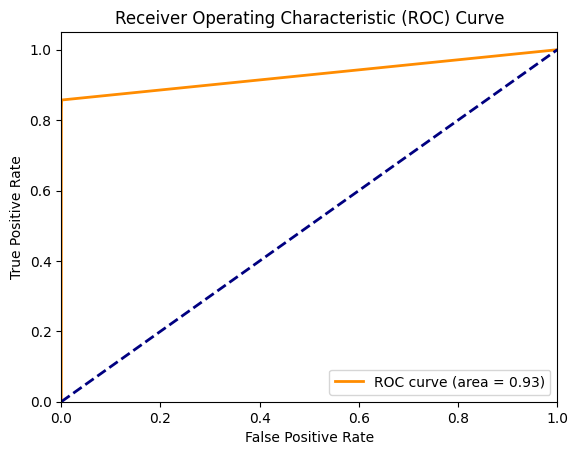

In [128]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.view(-1), outputs)
roc_auc = roc_auc_score(y_test.view(-1), outputs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [129]:
print(classification_report(y_test.view(-1), predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [142]:
train_recall_list = []
test_recall_list = []
training_time_list = []
pct_of_train_data = []
epoch_loss_list = []

In [145]:
for i in np.linspace(0.1, 1.0, 10):
    knn = KNeighborsClassifier(n_neighbors=4)  
    train = X_train[:int(i*len(X_train))]
    train_labels = np.array(y_train.view(-1))[:int(i*len(X_train))]
    knn.fit(train, train_labels)
    predictions = knn.predict(train)
    train_recall_list.append(recall_score(train_labels, predictions))

    labels_test = np.array(y_test.view(-1))
    predictions = knn.predict(X_test)
    test_recall_list.append(recall_score(labels_test,predictions))

    pct_of_train_data.append(i)
    print('finished', i)

finished 0.1
finished 0.2
finished 0.30000000000000004
finished 0.4
finished 0.5
finished 0.6
finished 0.7000000000000001
finished 0.8
finished 0.9
finished 1.0


In [146]:
train_recall_list

[0.7804878048780488,
 0.7804878048780488,
 0.810126582278481,
 0.7633587786259542,
 0.7714285714285715,
 0.7383177570093458,
 0.7559055118110236,
 0.7474402730375427,
 0.7621951219512195,
 0.7368421052631579,
 0.7411167512690355]

In [147]:
test_recall_list

[0.5612244897959183,
 0.6530612244897959,
 0.673469387755102,
 0.7040816326530612,
 0.6938775510204082,
 0.7142857142857143,
 0.7244897959183674,
 0.7244897959183674,
 0.7244897959183674,
 0.7448979591836735]

# SVM

In [ ]:
from sklearn.svm import SVC

In [154]:
train_recall = []
test_recall = []
max_iter=10
svm = SVC(kernel='linear')

for i in range(1, max_iter + 1):
      # You can choose different kernels such as 'linear', 'rbf', etc.
    svm.max_iter = i
    svm.fit(X_train, y_train.view(-1))
    
    # Predict on train and test data
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    
    # Calculate accuracy
    train_re = recall_score(y_train.view(-1), y_train_pred)
    test_re = recall_score(y_test.view(-1), y_test_pred)
    
    train_recall.append(train_re)
    test_recall.append(test_re)
    print('finished',i)

/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 1


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 2


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 3


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 4


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 5


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 6


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 7


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 8


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 9


/Users/dorothy.duan/miniconda3/envs/gaml/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


finished 10


In [155]:
train_recall

[0.2639593908629442,
 0.22081218274111675,
 0.9771573604060914,
 0.9847715736040609,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [156]:
test_recall

[0.2653061224489796,
 0.22448979591836735,
 1.0,
 0.9897959183673469,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [97]:
from sklearn.svm import SVC

In [130]:
# Initialize SVM classifier
svm = SVC(kernel='linear', probability=True)  # You can choose different kernels such as 'linear', 'rbf', etc.

# Fit the SVM model
svm.fit(X_train, y_train.view(-1))


# Predict the labels
predictions = svm.predict(X_test)


In [131]:
np.mean(predictions==np.array(y_test.view(-1)))

0.9994382219725431

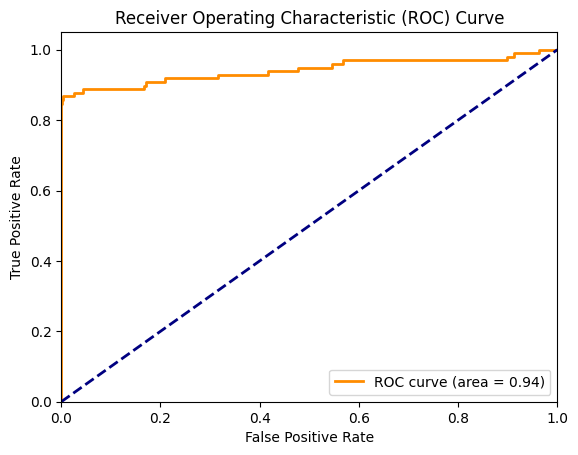

In [132]:
outputs = svm.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.view(-1), outputs)
roc_auc = roc_auc_score(y_test.view(-1), outputs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [133]:
print(classification_report(y_test.view(-1), predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [165]:
# Initialize SVM classifier
for ker in ('linear', 'rbf'):
    svm = SVC(kernel=ker, probability=True)  # You can choose different kernels such as 'linear', 'rbf', etc.

    # Fit the SVM model
    svm.fit(X_train, y_train.view(-1))

    # Predict the labels
    predictions = svm.predict(X_test)

    print(recall_score(predictions,y_test.view(-1)))

0.8666666666666667
0.8526315789473684
